# Keep-it-dry! RidgeClassifier
Dataset: ki_ro_ros.csv

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import RidgeClassifier

from pprint import pprint

## Dataset Selection

In [3]:
datasets_dict = {}

datasets_dict['ii_mm_adasyn'] = pd.read_csv('./../Preprocessing/kid_train_ii_mm_adasyn.csv', index_col=0)
datasets_dict['ii_mm_ros'] = pd.read_csv('./../Preprocessing/kid_train_ii_mm_ros.csv', index_col=0)
datasets_dict['ii_mm_rus'] = pd.read_csv('./../Preprocessing/kid_train_ii_mm_rus.csv', index_col=0)
datasets_dict['ii_mm_smote'] = pd.read_csv('./../Preprocessing/kid_train_ii_mm_smote.csv', index_col=0)
datasets_dict['ii_mm_smotenc_1'] = pd.read_csv('./../Preprocessing/kid_train_ii_mm_smotenc_1.csv', index_col=0)

datasets_dict['ii_ro_adasyn'] = pd.read_csv('./../Preprocessing/kid_train_ii_ro_adasyn.csv', index_col=0)
datasets_dict['ii_ro_ros'] = pd.read_csv('./../Preprocessing/kid_train_ii_ro_ros.csv', index_col=0)
datasets_dict['ii_ro_rus'] = pd.read_csv('./../Preprocessing/kid_train_ii_ro_rus.csv', index_col=0)
datasets_dict['ii_ro_smote'] = pd.read_csv('./../Preprocessing/kid_train_ii_ro_smote.csv', index_col=0)
datasets_dict['ii_ro_smotenc_1'] = pd.read_csv('./../Preprocessing/kid_train_ii_ro_smotenc_1.csv', index_col=0)

datasets_dict['ii_st_adasyn'] = pd.read_csv('./../Preprocessing/kid_train_ii_st_adasyn.csv', index_col=0)
datasets_dict['ii_st_ros'] = pd.read_csv('./../Preprocessing/kid_train_ii_st_ros.csv', index_col=0)
datasets_dict['ii_st_rus'] = pd.read_csv('./../Preprocessing/kid_train_ii_st_rus.csv', index_col=0)
datasets_dict['ii_st_smote'] = pd.read_csv('./../Preprocessing/kid_train_ii_st_smote.csv', index_col=0)
datasets_dict['ii_st_smotenc_1'] = pd.read_csv('./../Preprocessing/kid_train_ii_st_smotenc_1.csv', index_col=0)

datasets_dict['ki_mm_adasyn'] = pd.read_csv('./../Preprocessing/kid_train_ki_mm_adasyn.csv', index_col=0)
datasets_dict['ki_mm_ros'] = pd.read_csv('./../Preprocessing/kid_train_ki_mm_ros.csv', index_col=0)
datasets_dict['ki_mm_rus'] = pd.read_csv('./../Preprocessing/kid_train_ki_mm_rus.csv', index_col=0)
datasets_dict['ki_mm_smote'] = pd.read_csv('./../Preprocessing/kid_train_ki_mm_smote.csv', index_col=0)
datasets_dict['ki_mm_smotenc_1'] = pd.read_csv('./../Preprocessing/kid_train_ki_mm_smotenc_1.csv', index_col=0)

datasets_dict['ki_ro_adasyn'] = pd.read_csv('./../Preprocessing/kid_train_ki_ro_adasyn.csv', index_col=0)
datasets_dict['ki_ro_ros'] = pd.read_csv('./../Preprocessing/kid_train_ki_ro_ros.csv', index_col=0)
datasets_dict['ki_ro_rus'] = pd.read_csv('./../Preprocessing/kid_train_ki_ro_rus.csv', index_col=0)
datasets_dict['ki_ro_smote'] = pd.read_csv('./../Preprocessing/kid_train_ki_ro_smote.csv', index_col=0)
datasets_dict['ki_ro_smotenc_1'] = pd.read_csv('./../Preprocessing/kid_train_ki_ro_smotenc_1.csv', index_col=0)

datasets_dict['ki_st_adasyn'] = pd.read_csv('./../Preprocessing/kid_train_ki_st_adasyn.csv', index_col=0)
datasets_dict['ki_st_ros'] = pd.read_csv('./../Preprocessing/kid_train_ki_st_ros.csv', index_col=0)
datasets_dict['ki_st_rus'] = pd.read_csv('./../Preprocessing/kid_train_ki_st_rus.csv', index_col=0)
datasets_dict['ki_st_smote'] = pd.read_csv('./../Preprocessing/kid_train_ki_st_smote.csv', index_col=0)
datasets_dict['ki_st_smotenc_1'] = pd.read_csv('./../Preprocessing/kid_train_ki_st_smotenc_1.csv', index_col=0)

c:\Users\RAYHAN EGAR\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\RAYHAN EGAR\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\RAYHAN EGAR\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\RAYHAN EGAR\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values

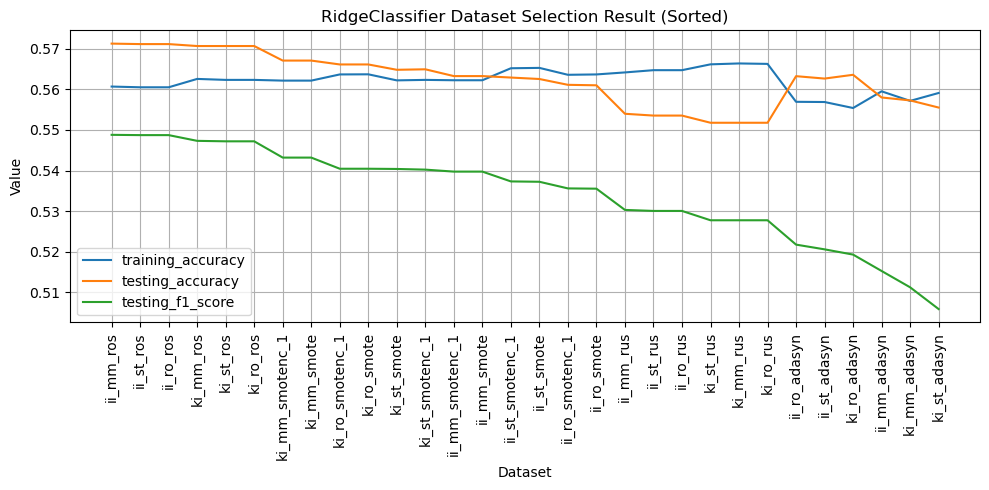

In [4]:
dataset_result = {}
dataset_result['dataset'] = []
dataset_result['training_accuracy'] = []
dataset_result['testing_accuracy'] = []
dataset_result['testing_f1_score'] = []

for title, data in datasets_dict.items():

    X_df = data.copy()
    y_df = X_df.pop('failure')
    object_cols = X_df.select_dtypes(include=['object']).columns
    X_df = X_df.drop(object_cols, axis=1)

    X_train, X_val, y_train, y_val = train_test_split(X_df, y_df, test_size=.2, stratify=y_df, random_state=42)
    
    rc_dataset = RidgeClassifier()
    rc_dataset.fit(X_train, y_train)
    
    y_predict = rc_dataset.predict(X_val)

    dataset_result['dataset'].append(title)
    dataset_result['training_accuracy'].append(rc_dataset.score(X_train, y_train))
    dataset_result['testing_accuracy'].append(rc_dataset.score(X_val, y_val))
    dataset_result['testing_f1_score'].append(f1_score(y_val, y_predict))

df_result = pd.DataFrame(dataset_result)
df_result_sorted = df_result.sort_values(by='testing_f1_score', ascending=False)

plt.figure(figsize=[10, 5])

sns.lineplot(data=df_result_sorted, x='dataset', y='training_accuracy', label='training_accuracy').grid(True)
sns.lineplot(data=df_result_sorted, x='dataset', y='testing_accuracy', label='testing_accuracy')
sns.lineplot(data=df_result_sorted, x='dataset', y='testing_f1_score', label='testing_f1_score')

plt.title("RidgeClassifier Dataset Selection Result (Sorted)")
plt.ylabel("Value")
plt.xlabel("Dataset")
plt.xticks(rotation=90)

plt.tight_layout()
plt.legend()
plt.show()

## Data Read

In [2]:
df_train = pd.read_csv('./../Preprocessing/kid_train_ki_ro_ros.csv', index_col=0)
df_test = pd.read_csv('./../Preprocessing/kid_test_ki_ro.csv', index_col=0)

In [3]:
df_train.head()

,loading,attribute_0,attribute_1,attribute_2,attribute_3,measurement_0,measurement_1,measurement_2,measurement_3,measurement_4,...,measurement_9,measurement_10,measurement_11,measurement_12,measurement_13,measurement_14,measurement_15,measurement_16,measurement_17,failure
0,-0.866789,7.0,8.0,9,5,0.000000,0.000000,-0.50,0.191386,0.587838,...,-0.582308,-0.155224,-0.823018,1.817328,-0.416608,-0.826421,-0.996926,-0.798281,0.405153,0.0
1,-0.768774,7.0,8.0,9,5,1.166667,-0.833333,-0.75,0.320974,-0.146396,...,0.783846,1.031983,-0.658824,0.022965,-0.627395,-0.310259,-0.299693,-0.369968,-0.127292,0.0
2,-0.819112,7.0,8.0,9,5,0.833333,-1.166667,-0.25,0.204120,-0.062312,...,0.989231,-0.298507,-0.298414,1.089248,0.777147,1.355888,-0.453893,0.677069,-0.248529,0.0
3,-0.437692,7.0,8.0,9,5,1.000000,-1.000000,0.00,-0.366667,-0.410661,...,0.801538,0.121677,-0.422506,-0.882568,-0.259759,-0.239060,0.601434,0.327001,0.808704,0.0
4,1.342337,7.0,8.0,9,5,0.333333,-1.000000,0.50,1.169663,0.912162,...,-0.840000,0.540156,0.372890,0.374217,0.401703,-1.695250,-0.935963,-0.016735,-0.790371,0.0


In [4]:
df_test_id = df_test[['id']]
df_test.drop(columns=['id', 'product_code', 'product_code_F', 'product_code_G', 'product_code_H', 'product_code_I'], inplace=True)
df_test.head()

,loading,attribute_0,attribute_1,attribute_2,attribute_3,measurement_0,measurement_1,measurement_2,measurement_3,measurement_4,...,measurement_8,measurement_9,measurement_10,measurement_11,measurement_12,measurement_13,measurement_14,measurement_15,measurement_16,measurement_17
0,-0.059136,5.0,6.0,6,4,-0.166667,0.166667,0.0,1.138951,-1.168919,...,-0.274792,-0.482308,-0.126795,-0.579540,1.075678,-1.388928,0.417316,-0.634221,0.570330,-0.435202
1,-0.183139,5.0,6.0,6,4,0.666667,0.000000,-1.5,0.073783,0.144144,...,0.265708,0.463846,-1.213362,-0.441432,0.397704,1.314407,0.356512,-0.104508,-1.061511,-1.068447
2,-0.210763,5.0,6.0,6,4,0.166667,0.666667,-0.5,0.517228,-0.941441,...,-0.940954,0.241538,0.519687,-0.571355,-0.419624,-1.599006,-0.148114,1.068135,-0.193578,-0.276961
3,-0.199304,5.0,6.0,6,4,0.166667,0.500000,1.0,-0.948689,-0.635886,...,-0.052233,0.277692,1.155935,-1.554987,-0.406054,-0.081618,-0.184492,-1.209016,-0.152872,-0.696814
4,1.750358,5.0,6.0,6,4,1.166667,1.333333,0.5,0.017603,0.719219,...,0.093868,0.723846,-0.883582,-0.692583,0.120042,0.322214,0.083671,-0.848361,0.317051,0.644913


In [5]:
# Scale
# Scaled already

## Hyperparameter Tuning using GridSearchCV

In [7]:
X_df = df_train[df_train.columns[:-1]]
y_df = df_train[df_train.columns[-1]]

X_train, X_val, y_train, y_val = train_test_split(X_df, y_df, test_size=.75, random_state=42, stratify=y_df)
X_train.head()

,loading,attribute_0,attribute_1,attribute_2,attribute_3,measurement_0,measurement_1,measurement_2,measurement_3,measurement_4,...,measurement_8,measurement_9,measurement_10,measurement_11,measurement_12,measurement_13,measurement_14,measurement_15,measurement_16,measurement_17
6706,0.993247,5.0,5.0,8,8,0.166667,-0.333333,0.50,-0.287266,0.212462,...,-0.681302,-0.199231,-0.126795,0.491049,0.177453,0.173172,-0.383536,0.118340,0.815468,0.345187
2851,0.168201,7.0,8.0,9,5,-0.500000,0.500000,-0.25,1.610112,-0.801802,...,0.816805,1.340769,-0.651599,-0.293606,0.519311,-1.298084,0.634549,0.042520,0.373587,0.258580
24217,0.433395,7.0,6.0,6,9,-1.166667,1.833333,-1.50,0.100000,-0.346096,...,1.059803,-0.036154,-0.226866,-1.436829,0.146660,-0.261178,1.075252,0.834529,-1.053370,1.187333
17913,-0.389810,7.0,5.0,6,6,0.833333,-1.000000,-0.50,-0.656554,1.129129,...,0.629069,0.946923,1.376546,-0.232123,1.051670,-0.109297,0.297266,-0.457992,0.617820,0.005658
34848,0.142623,5.0,5.0,8,8,0.333333,0.166667,0.75,-0.116479,-0.665165,...,-0.241484,-0.215385,-0.511158,1.067008,-0.031315,-0.679915,-0.332606,0.001537,0.077793,-0.553492


In [8]:
# Define model
model = RidgeClassifier() 

# Define hyperparameter grid
param_grid = {
    'alpha': np.logspace(-2, 2, 5),  # Search across different alpha values in log space
    'solver': ['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga', 'lbfgs']
}

# Define GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=10, scoring='f1')  # Use F1 score for imbalanced data


In [9]:
# GridSearchCV fitting
grid_search.fit(X_train, y_train)

c:\Users\RAYHAN EGAR\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
50 fits failed out of a total of 400.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
50 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\RAYHAN EGAR\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\RAYHAN EGAR\anaconda3\Lib\site-packages\sklearn\linear_model\_ridge.py", line 1424, in fit
    super().fit(X, Y, sample_weight=sample_weight)
  File "c:\Users\RAYHAN EGAR\anaconda3\Lib\site-packages\sklearn\linear_model\_ridge.py", line 825, in fit
    raise ValueError(
ValueErro

GridSearchCV(cv=10, estimator=RidgeClassifier(),
             param_grid={'alpha': array([1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02]),
                         'solver': ['auto', 'svd', 'cholesky', 'lsqr',
                                    'sparse_cg', 'sag', 'saga', 'lbfgs']},
             scoring='f1')

In [10]:
rc_best = grid_search.best_estimator_
print(f"Best parameters: {grid_search.best_params_}")
print(f"Best f1-score: {grid_search.best_score_}")

Best parameters: {'alpha': 100.0, 'solver': 'auto'}
Best f1-score: 0.5365868977932797


## Prediction

In [11]:
y_pred = rc_best.predict(df_test)
y_pred_df = pd.DataFrame(y_pred, columns=['failure'])

In [12]:
y_submission = pd.concat([df_test_id, y_pred_df], axis=1)

In [13]:
y_submission.head()

,id,failure
0,26570,0.0
1,26571,0.0
2,26572,0.0
3,26573,0.0
4,26574,1.0


In [14]:
y_submission.to_csv('./../Submission/kid_submission_rc_v2.csv', index=False)